# Importing Necessary Tensorflow Packages WIth NLP Data and Bert Models

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)
!pip install -q tensorflow == 2.3.0
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git
!pip install -Uqr models/official/requirements.txt

In [ ]:
import tensorflow_hub as hub 
import sys 
sys.path.append('models') 
from official.nlp.data import classifier_data_lib 
from official.nlp.bert import tokenization 
from official.nlp import optimization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Importing World Bank Project Dataset

In [ ]:
data = pd.read_excel(r'/content/World_Bank_Projects_downloaded_6_14_2022.xlsx', skiprows=2)

In [ ]:
data.shape

(21543, 27)

# Dropping Null Values And Other Labels Which Are Not Important For Classification

In [ ]:
data.dropna(subset = ['projectstatusdisplay'], axis=0, inplace = True)
data.dropna(subset = ['pdo'], axis=0, inplace = True)

In [ ]:
data.shape

(11577, 27)

In [ ]:
data.drop(data[(data['projectstatusdisplay'] == 'Active') | (data['projectstatusdisplay'] == 'Pipeline')].index, axis =0, inplace=True)

In [ ]:
data.shape

(7600, 27)

In [ ]:
data

,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
194,P178571,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,The Project Development Objective (PDO) of the...,NaN,NaN,http://projects.worldbank.org/P178571/null?lan...,...,0.0,NaN,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,P178288,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,To strengthen the capacity of Romanian institu...,"Ministry of Health, Department for Emergency S...",NaN,http://projects.worldbank.org/P178288/null?lan...,...,0.0,Ministry of Finance,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,P177493,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,The development objective is to increase energ...,Ukrexim Bank,NaN,http://projects.worldbank.org/P177493/null?lan...,...,0.0,Ukrexim Bank,Investment Project Financing,NaN,Moderate,NaN,NaN,NaN,NaN,NaN
657,P176771,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,To improve living conditions of vulnerable hou...,"Secretariat for Agrarian, Territorial and Urba...",NaN,http://projects.worldbank.org/P176771/null?lan...,...,0.0,United Mexican States,Investment Project Financing,NaN,Substantial,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21185,P000527,Western and Central Africa,Republic of Chad,Closed,Bank Approved,Education Sector Reform Project,The revised PDO is to (i) improve access and e...,NaN,NaN,http://projects.worldbank.org/P000527/educatio...,...,0.0,NaN,Specific Investment Loan,B,NaN,Primary Education,Central Government (Central Agencies),Social Protection,Education for all,Decentralization
21332,P000309,Western and Central Africa,Burkina Faso,Closed,Bank Approved,Basic Education Sector Project,The project development objective i s to assis...,NaN,NaN,http://projects.worldbank.org/P000309/basic-ed...,...,0.0,NaN,Specific Investment Loan,B,NaN,Primary Education,"Adult, Basic and Continuing Education",Tertiary Education,Rural services and infrastructure,Gender
21334,P000306,Western and Central Africa,Burkina Faso,Closed,Bank Approved,Ouagadougou Water Supply Project,The objectives of the Project are to assist th...,NaN,NaN,http://projects.worldbank.org/P000306/ouagadou...,...,0.0,NaN,Specific Investment Loan,A,NaN,Water Supply,NaN,NaN,Urban services and housing for the poor,NaN
21470,P000119,Western and Central Africa,Republic of Benin,Dropped,Concept Review,Energy Project (07),ENERGY SECTOR PROJECT INCLUDES POWER COMPONENT...,NaN,NaN,http://projects.worldbank.org/P000119/energy-p...,...,0.0,NaN,Specific Investment Loan,C,NaN,Power,NaN,NaN,Other financial and private sector development,Regional integration


In [ ]:
df = data[['id','pdo','projectstatusdisplay']]

In [ ]:
df.loc[data["projectstatusdisplay"] == "Dropped", "projectstatusdisplay"] = 0
df.loc[data["projectstatusdisplay"] == "Closed", "projectstatusdisplay"] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
df

,id,pdo,projectstatusdisplay
2,P252337,To improve citizen and government access to co...,0
194,P178571,The Project Development Objective (PDO) of the...,0
258,P178288,To strengthen the capacity of Romanian institu...,0
473,P177493,The development objective is to increase energ...,0
657,P176771,To improve living conditions of vulnerable hou...,0
...,...,...,...
21185,P000527,The revised PDO is to (i) improve access and e...,1
21332,P000309,The project development objective i s to assis...,1
21334,P000306,The objectives of the Project are to assist th...,1
21470,P000119,ENERGY SECTOR PROJECT INCLUDES POWER COMPONENT...,0


In [ ]:
df['projectstatusdisplay'].value_counts()

1    6500
0    1100
Name: projectstatusdisplay, dtype: int64

# Visualizing Item Count For Different Labels Of Dataset

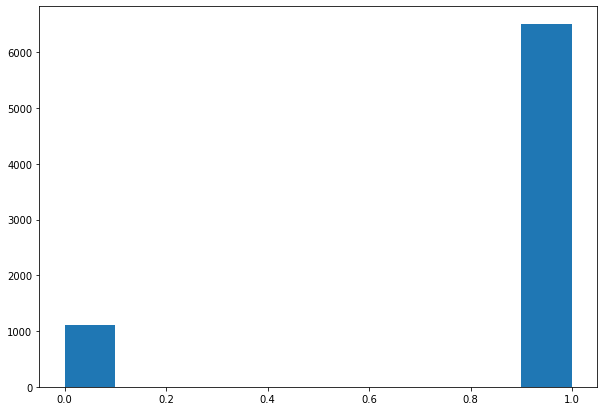

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['projectstatusdisplay'])
 
# Show plot
plt.show()

# Splitting Train And Validation Dataset

In [ ]:
train_df, remaining = train_test_split (df, random_state=42, train_size=0.75, stratify=df.projectstatusdisplay.values) 
valid_df, _ = train_test_split(remaining, random_state=42, train_size=0.075, stratify=remaining.projectstatusdisplay.values) 
train_df.shape, valid_df.shape

((5700, 3), (142, 3))

In [ ]:
train_df[['projectstatusdisplay']] = train_df[['projectstatusdisplay']].apply(pd.to_numeric)
print(train_df.dtypes)
valid_df[['projectstatusdisplay']] = valid_df[['projectstatusdisplay']].apply(pd.to_numeric)
print(valid_df.dtypes)

id                      object
pdo                     object
projectstatusdisplay     int64
dtype: object
id                      object
pdo                     object
projectstatusdisplay     int64
dtype: object


# Differentiating In Text and Label

In [ ]:
with tf.device('/cpu:0'): 
  train_data = tf.data.Dataset.from_tensor_slices((train_df['pdo'].values, train_df['projectstatusdisplay'].values)) 
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.pdo.values, valid_df.projectstatusdisplay.values)) 
  
  for text, label in train_data.take(1): 
    print(text) 
    print(label)

tf.Tensor(b'Project Development Objective (Note: will be disclosed in the MOS)  10/2/97:  CHANGED IDA AMOUNT TO $150M PER SERGE MICHAILOF (DKT). 01/05/98:  LAST UPDATE TO THIS TIMETABLE (DKT)  PROPOSAL TO ROC TO INCREASE CREDIT AMOUNT TO US$200M. NOT YET APPROVED. PCD BEING REVISED IN LIGHT OF PREPARATION MISSION. 01/16/98:  PER DISCUSSION BETWEEN RVPS AND CD, THE AMOUNT HAS BEEN INCREASED FROM $150M TO $200M (ANJU/BOB).  BOARD DATE ON 6/11/98. FOCUSES ON ELEIMINATING DISTORTIONS THAT DISADVANTAGE THE POOR. Board Schedule Comments', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)


# Tokenizing & Padding and Truncating Sequences

In [ ]:
label_list = [0, 1] # Label categories 
max_seq_length = 128 #maximum length of (token) input sequences 
train_batch_size = 32

bert_layer= hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True) 

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() 
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() 
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
tokenizer.convert_tokens_to_ids (tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

# Preprocossing Of Data

In [ ]:
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer): 
  example = classifier_data_lib.InputExample(guid=None, 
                                             text_a= text.numpy (), 
                                             text_b = None, 
                                             label = label.numpy()) 
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer) 
  
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [ ]:
def to_feature_map(text, label): 
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], Tout=[tf.int32, tf.int32, tf.int32, tf.int32]) 
  
  input_ids.set_shape ([max_seq_length]) 
  input_mask.set_shape([max_seq_length]) 
  segment_ids.set_shape([max_seq_length]) 
  label_id.set_shape([]) 
  
  x = { 
      'input_word_ids': input_ids, 
       'input_mask': input_mask, 
       'input_type_ids': segment_ids 
       } 
       
  return (x, label_id)

In [ ]:
with tf.device('/cpu:0'): 
  # train 
  train_data= (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle (1000) 
  .batch(32, drop_remainder=True) 
  .prefetch(tf.data.experimental.AUTOTUNE))
  # valid 
  valid_data = (valid_data.map(to_feature_map, 
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch (32, drop_remainder=True) 
  .prefetch(tf.data.experimental.AUTOTUNE))  

In [ ]:
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

# Building the model

In [ ]:
def create_model(): 
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, 
                                         name="input_word_ids") 
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, 
                                     name="input_mask") 
  input_type_ids  = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, 
                                      name="input_type_ids ") 
  pooled_output, sequence_output= bert_layer([input_word_ids, input_mask, input_type_ids]) 
  drop= tf.keras.layers.Dropout(0.4)(pooled_output) 
  output= tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop)
  model= tf.keras.Model( 
      inputs={ 
          'input_word_ids': input_word_ids, 
          'input_mask': input_mask, 
          'input_type_ids': input_type_ids 
          }, 
          outputs = output) 
  return model

In [ ]:
model = create_model() 
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss= tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy()]) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids  (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',         

# Model View With Parameters

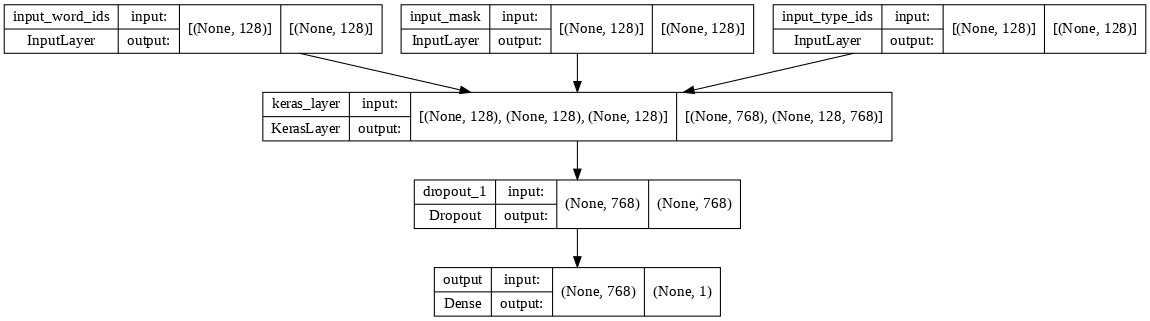

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

# Fitting Model With Train Data

In [ ]:
epochs = 4 
history = model.fit (train_data, 
                     validation_data=valid_data, 
                     epochs=epochs, 
                     verbose=1)

Epoch 1/4
178/178 [==============================] - 167s 834ms/step - loss: 0.4400 - binary_accuracy: 0.8434 - val_loss: 0.3427 - val_binary_accuracy: 0.8750
Epoch 2/4
178/178 [==============================] - 150s 831ms/step - loss: 0.3685 - binary_accuracy: 0.8611 - val_loss: 0.3449 - val_binary_accuracy: 0.8906
Epoch 3/4
178/178 [==============================] - 150s 830ms/step - loss: 0.2828 - binary_accuracy: 0.8931 - val_loss: 0.3164 - val_binary_accuracy: 0.8984
Epoch 4/4
178/178 [==============================] - 150s 831ms/step - loss: 0.1949 - binary_accuracy: 0.9289 - val_loss: 0.4247 - val_binary_accuracy: 0.8828


In [ ]:
import matplotlib.pyplot as plt 
def plot_graphs (history, metric): 
  plt.plot(history.history[metric]) 
  plt.plot(history.history['val_' +metric], '') 
  plt.xlabel("Epochs") 
  plt.ylabel(metric) 
  plt.legend([metric, 'val_'+metric]) 
  plt.show()

# Model Evaluation

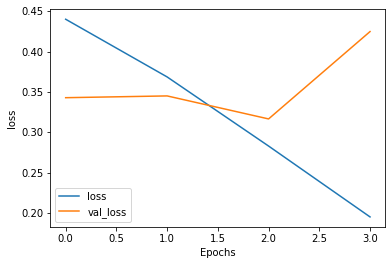

In [ ]:
plot_graphs (history, 'loss')

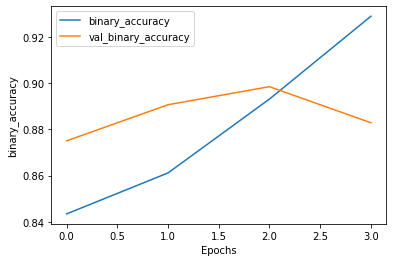

In [ ]:
plot_graphs (history, 'binary_accuracy')

# Prediction

## You can enter any project objective and see if it would be dropped or closed, One example is shown below.

In [ ]:
sample_example =["The program development objective is to support the Royal Government of Cambodia to effectively deal with the COVID-19 crisis and it s aftermath by: (i) continuing to provide timely and targeted relief to the affected population; (ii) facilitating robust recovery t hrough structural reforms; and (iii) building resilience against future economic shocks."] 
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example))) 
test_data= (test_data.map(to_feature_map).batch(1)) 
preds=model.predict(test_data) 
threshold = 0.5
['Closed' if pred >=threshold else 'Dropped' for pred in preds]

['Closed']

# Test Data

In [ ]:
dsc = df.head(30)
pdo_test = dsc['pdo'].tolist()
y_test = dsc['projectstatusdisplay'].tolist()

In [ ]:
sample_example = pdo_test
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example))) 
test_data= (test_data.map(to_feature_map).batch(1)) 
preds=model.predict(test_data) 
threshold = 0.5
y_predicted = []
for pred in preds:
  if pred >=threshold:
    y_predicted.append(1)
  else:
    y_predicted.append(0)


# Confusion Matrix

Text(33.0, 0.5, 'True')

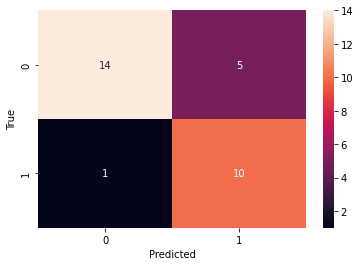

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_predicted) 
cm
from matplotlib import pyplot as plt
import seaborn as sn 
sn.heatmap (cm, annot=True, fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel('True')